# Turkey Earthquake 

## Project 1 Team 2
Cecilia Lizcano, 
Omar Alejandro Vallejo, 
Erica Alvarez, 
Roberto Rodas, 
Alvaro Corona

In [29]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [30]:
file = Path("../Resources/TurkeyEarthquakes_2008_2023.csv")

In [31]:
original_df = pd.read_csv(file)
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7770 entries, 0 to 7769
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             7770 non-null   object 
 1   latitude         7770 non-null   float64
 2   longitude        7770 non-null   float64
 3   depth            7770 non-null   float64
 4   mag              7770 non-null   float64
 5   magType          7770 non-null   object 
 6   nst              3718 non-null   float64
 7   gap              7139 non-null   float64
 8   dmin             4421 non-null   float64
 9   rms              5688 non-null   float64
 10  net              7770 non-null   object 
 11  id               7770 non-null   object 
 12  updated          7770 non-null   object 
 13  place            7724 non-null   object 
 14  type             7770 non-null   object 
 15  horizontalError  4567 non-null   float64
 16  depthError       5406 non-null   float64
 17  magError      

In [32]:
original_df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [33]:
df = original_df[['time', 'latitude', 'longitude', 'depth', 
                  'mag', 'magType', 'net', 'id', 'updated',
                  'type', 'status','locationSource', 'magSource']].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7770 entries, 0 to 7769
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            7770 non-null   object 
 1   latitude        7770 non-null   float64
 2   longitude       7770 non-null   float64
 3   depth           7770 non-null   float64
 4   mag             7770 non-null   float64
 5   magType         7770 non-null   object 
 6   net             7770 non-null   object 
 7   id              7770 non-null   object 
 8   updated         7770 non-null   object 
 9   type            7770 non-null   object 
 10  status          7770 non-null   object 
 11  locationSource  7770 non-null   object 
 12  magSource       7770 non-null   object 
dtypes: float64(4), object(9)
memory usage: 789.3+ KB


In [34]:
df.head()

,time,latitude,longitude,depth,mag,magType,net,id,updated,type,status,locationSource,magSource
0,2023-07-19T14:14:47.038Z,36.4116,53.9089,10.000,4.3,mb,us,us7000kgw7,2023-07-19T20:19:41.040Z,earthquake,reviewed,us,us
1,2023-07-18T20:30:55.209Z,45.0385,23.0251,12.806,4.0,mb,us,us7000kgn3,2023-07-19T04:47:16.666Z,earthquake,reviewed,us,us
2,2023-07-17T12:04:26.739Z,36.5808,23.0401,70.563,4.2,mb,us,us7000kgby,2023-07-17T12:24:40.040Z,earthquake,reviewed,us,us
3,2023-07-11T09:52:19.105Z,39.3973,26.2615,10.000,3.4,ml,us,us7000ketw,2023-07-11T13:19:44.229Z,earthquake,reviewed,us,us
4,2023-07-09T02:27:36.163Z,38.0000,36.3643,5.736,3.5,ml,us,us6000kr1s,2023-07-10T02:41:16.388Z,earthquake,reviewed,us,us


In [35]:
df['year'] = pd.DatetimeIndex(df['time']).year
df['month'] = pd.DatetimeIndex(df['time']).month
df['day'] = pd.DatetimeIndex(df['time']).day
df['hour'] = pd.DatetimeIndex(df['time']).hour
df['minute'] = pd.DatetimeIndex(df['time']).minute

In [36]:
df.head()

,time,latitude,longitude,depth,mag,magType,net,id,updated,type,status,locationSource,magSource,year,month,day,hour,minute
0,2023-07-19T14:14:47.038Z,36.4116,53.9089,10.000,4.3,mb,us,us7000kgw7,2023-07-19T20:19:41.040Z,earthquake,reviewed,us,us,2023,7,19,14,14
1,2023-07-18T20:30:55.209Z,45.0385,23.0251,12.806,4.0,mb,us,us7000kgn3,2023-07-19T04:47:16.666Z,earthquake,reviewed,us,us,2023,7,18,20,30
2,2023-07-17T12:04:26.739Z,36.5808,23.0401,70.563,4.2,mb,us,us7000kgby,2023-07-17T12:24:40.040Z,earthquake,reviewed,us,us,2023,7,17,12,4
3,2023-07-11T09:52:19.105Z,39.3973,26.2615,10.000,3.4,ml,us,us7000ketw,2023-07-11T13:19:44.229Z,earthquake,reviewed,us,us,2023,7,11,9,52
4,2023-07-09T02:27:36.163Z,38.0000,36.3643,5.736,3.5,ml,us,us6000kr1s,2023-07-10T02:41:16.388Z,earthquake,reviewed,us,us,2023,7,9,2,27


In [37]:
df['type'].unique()

array(['earthquake', 'explosion'], dtype=object)

## EDA Questions 

### 1. What was the date and time of the most disastrous earthquake recorded in Turkey according to the dataset?


In [56]:
df_increase = df.copy()
df_increase.sort_values(by='mag', ascending=False, inplace=True)
df_disastrous = df_increase.head(5)
df_disastrous 

,time,latitude,longitude,depth,mag,magType,net,id,updated,type,status,locationSource,magSource,year,month,day,hour,minute
709,2023-02-06T01:17:34.342Z,37.2256,37.0143,10.000,7.8,mww,us,us6000jllz,2023-07-19T08:32:38.718Z,earthquake,reviewed,us,us,2023,2,6,1,17
605,2023-02-06T10:24:48.811Z,38.0106,37.1962,7.432,7.5,mww,us,us6000jlqa,2023-06-17T18:00:10.939Z,earthquake,reviewed,us,us,2023,2,6,10,24
3382,2017-11-12T18:18:17.180Z,34.9109,45.9592,19.000,7.3,mww,us,us2000bmcg,2022-05-03T20:02:36.492Z,earthquake,reviewed,us,us,2017,11,12,18,18
5871,2011-10-23T10:41:23.250Z,38.7210,43.5080,18.000,7.1,mww,us,usp000j9rr,2022-04-08T22:08:47.620Z,earthquake,reviewed,us,us,2011,10,23,10,41
1734,2020-10-30T11:51:27.348Z,37.8973,26.7838,21.000,7.0,mww,us,us7000c7y0,2023-03-28T14:51:23.263Z,earthquake,reviewed,us,us,2020,10,30,11,51


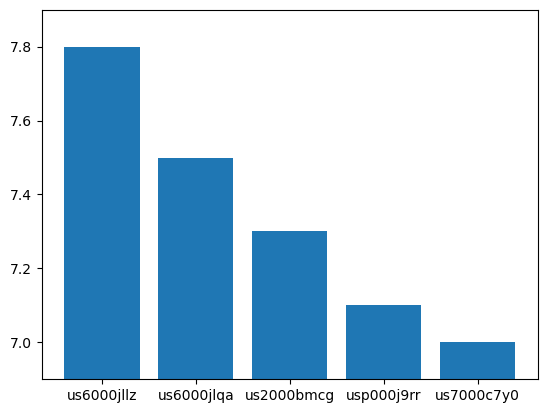

In [57]:
x= df_disastrous['id']
y= df_disastrous['mag']
plt.bar(x, y)
plt.ylim(6.9, 7.9)
plt.show()

### 2. During what period of time did the seismic activity increase in turkey?

In [100]:
df_time_range = df.copy()
df_time_range["year"] = df_time_range["year"].apply(lambda x: int(x))
df_time_range = df_time_range.loc[df_time_range["year"] >= 2023] 
df_time_range["month"] = df_time_range["month"].apply(lambda x: int(x)) 
df_time_range = df_time_range.loc[df_time_range["month"] <= 3] 
df_time_range = df_time_range.loc[df_time_range["mag"] >= 4.6] 

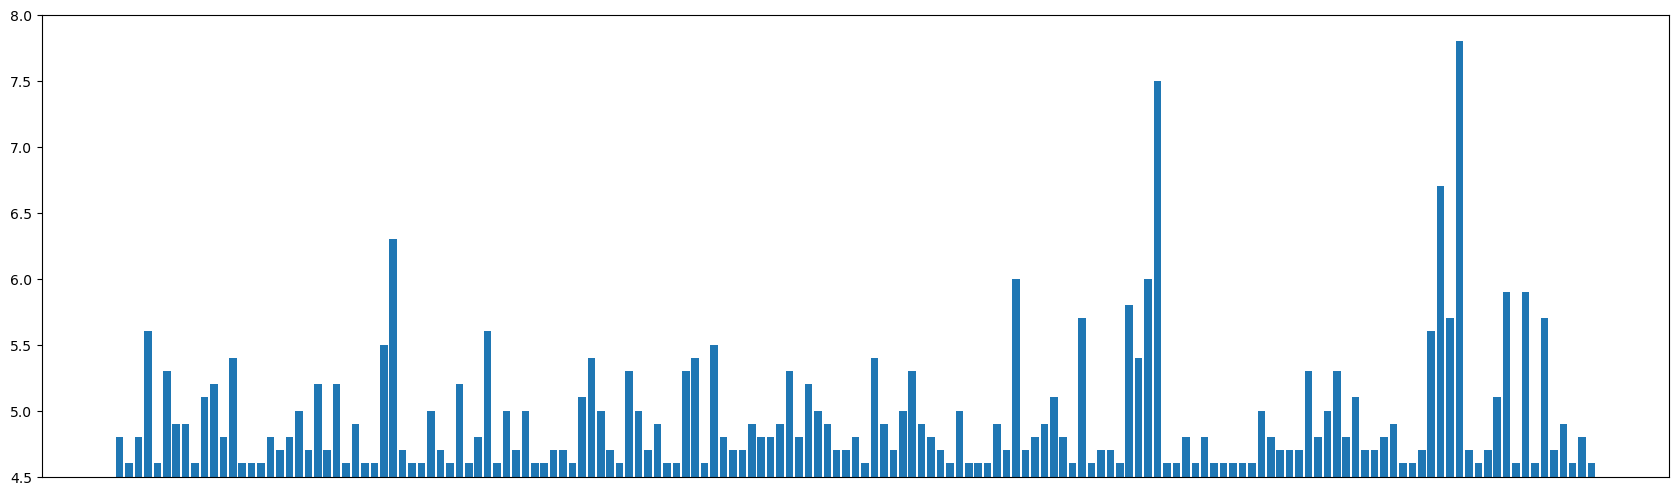

In [103]:
x= df_time_range['time']
y= df_time_range['mag']
plt.figure(figsize=(21, 6))
plt.xticks(rotation = 45)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylim(4.5, 8)
plt.bar(x, y)
plt.show()

In [53]:
df_increase = df.copy()
df_increase.sort_values(by='mag', ascending=False, inplace=True)
df_disastrous = df_increase.head(50)

In [54]:
grouped = df_disastrous.groupby(['year', 'month']).size().reset_index(name='count')
grouped.sort_values(by='year', ascending=False, inplace=False)


,year,month,count
36,2023,2,7
35,2023,1,2
34,2022,11,1
33,2022,1,1
32,2021,10,2
31,2021,9,1
30,2021,3,1
26,2020,5,1
24,2020,1,1
25,2020,2,1


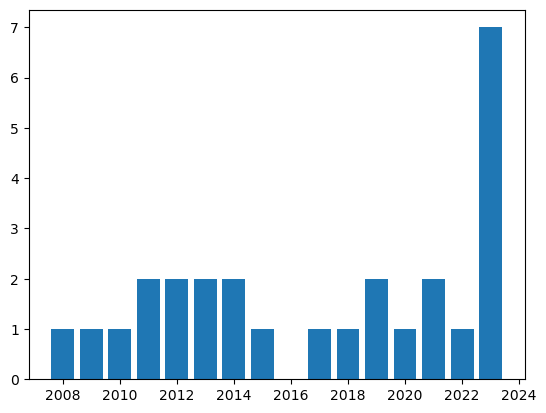

In [40]:
x= grouped['year']
y= grouped['count']
plt.bar(x, y)
plt.show()

### 3. What was the magnitude of the most devastating earthquake in Turkey's history according to the dataset?

### 4. In which specific region of Turkey did the most destructive earthquake recorded in the dataset occur?

### 5. What was the depth of the epicenter of the most devastating earthquake recorded in Turkey, according to the dataset?

### 6. Which were the main cities or localities affected by the most catastrophic earthquake in Turkey according to the dataset?